# Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

# Read File

In [1]:
import pandas as pd
A = pd.read_csv("Project 1_training_set.csv")
testdata = pd.read_csv("Project 1_testing_set.csv")
A.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Missing data 

In [2]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
A.Alley = A["Alley"].fillna("No Alley")
A.MasVnrType= A["MasVnrType"].fillna("NoMas")
A.BsmtQual= A["BsmtQual"].fillna("NoBsmt")
A.BsmtCond= A["BsmtCond"].fillna("NoBsmt")
A.BsmtExposure= A["BsmtExposure"].fillna("NoBsmt")
A.BsmtFinType1= A["BsmtFinType1"].fillna("NoBsmt")
A.BsmtFinType2= A["BsmtFinType2"].fillna("NoBsmt")
A.Electrical= A["Electrical"].fillna(A.Electrical.mode()[0])
A.FireplaceQu= A["FireplaceQu"].fillna("Nofire")
A.GarageType= A["GarageType"].fillna("NoGarage")
A.GarageFinish= A["GarageFinish"].fillna("NoGarage")
A.GarageQual= A["GarageQual"].fillna("NoGarage")
A.GarageCond= A["GarageCond"].fillna("NoGarage")
A.PoolQC= A["PoolQC"].fillna("NoPool")
A.Fence= A["Fence"].fillna("NoFence")
A.MiscFeature= A["MiscFeature"].fillna("Nofeature")

testdata.Alley = testdata["Alley"].fillna("No Alley")
testdata.MasVnrType= testdata["MasVnrType"].fillna("NoMas")
testdata.BsmtQual= testdata["BsmtQual"].fillna("NoBsmt")
testdata.BsmtCond= testdata["BsmtCond"].fillna("NoBsmt")
testdata.BsmtExposure= testdata["BsmtExposure"].fillna("NoBsmt")
testdata.BsmtFinType1= testdata["BsmtFinType1"].fillna("NoBsmt")
testdata.BsmtFinType2= testdata["BsmtFinType2"].fillna("NoBsmt")
testdata.Electrical= testdata["Electrical"].fillna(A.Electrical.mode()[0])
testdata.FireplaceQu= testdata["FireplaceQu"].fillna("Nofire")
testdata.GarageType= testdata["GarageType"].fillna("NoGarage")
testdata.GarageFinish= testdata["GarageFinish"].fillna("NoGarage")
testdata.GarageQual= testdata["GarageQual"].fillna("NoGarage")
testdata.GarageCond= testdata["GarageCond"].fillna("NoGarage")
testdata.PoolQC= testdata["PoolQC"].fillna("NoPool")
testdata.Fence= testdata["Fence"].fillna("NoFence")
testdata.MiscFeature= testdata["MiscFeature"].fillna("Nofeature")

In [4]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes != "object"):
        con.append(i)
        x = A[i].mean()
        A[i] = A[i].fillna(x)
    else:
        cat.append(i)
        x = A[i].mode()[0]
        A[i] = A[i].fillna(x)
        
for i in testdata.columns:
    if(testdata[i].dtypes != "object"):
        x = testdata[i].mean()
        testdata[i] = testdata[i].fillna(x)
    else:
        x = testdata[i].mode()[0]
        testdata[i] = testdata[i].fillna(x)

In [5]:
A.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [6]:
testdata.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

# EDA

In [7]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [8]:
A.corr().sort_values(by = ["SalePrice"])[["SalePrice"]]

,SalePrice
KitchenAbvGr,-0.135907
EnclosedPorch,-0.128578
MSSubClass,-0.084284
OverallCond,-0.077856
YrSold,-0.028923
LowQualFinSF,-0.025606
Id,-0.021917
MiscVal,-0.021190
BsmtHalfBath,-0.016844
BsmtFinSF2,-0.011378


# Define X & Y

In [9]:
Y = A.SalePrice
X = A.drop(labels=["Id", "SalePrice"],axis=1)

# Remove Outliers

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(A[con]),columns = con)
X2 = []

for i in con:
    X2.extend(list(X1[X1[i] > 3].index))
    X2.extend(list(X1[X1[i] < -3].index))
from numpy import unique
OL = list(unique(X2))
X = X.drop(index = OL,axis = 0)
Y = Y.drop(index = OL, axis = 0)

In [11]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFence,Nofeature,0,2,2008,WD,Normal
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,0,NoPool,NoFence,Nofeature,0,9,2008,WD,Normal
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,0,NoPool,NoFence,Nofeature,0,12,2008,WD,Normal
6,20,RL,75.0,10084,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFence,Nofeature,0,8,2007,WD,Normal
10,20,RL,70.0,11200,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFence,Nofeature,0,2,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180,RM,35.0,3675,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFence,Nofeature,0,5,2006,WD,Normal
1453,20,RL,90.0,17217,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFence,Nofeature,0,7,2006,WD,Abnorml
1454,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFence,Nofeature,0,10,2009,WD,Normal
1455,60,RL,62.0,7917,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFence,Nofeature,0,8,2007,WD,Normal


In [12]:
Y

0       208500
2       223500
4       250000
6       307000
10      129500
         ...  
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
Name: SalePrice, Length: 1015, dtype: int64

In [13]:
X.shape

(1015, 79)

In [14]:
X.index = range(0,1015,1)
Y.index = range(0,1015,1)

In [15]:
Y

0       208500
1       223500
2       250000
3       307000
4       129500
         ...  
1010    145000
1011     84500
1012    185000
1013    175000
1014    210000
Name: SalePrice, Length: 1015, dtype: int64

In [16]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes != "object"):
        con.append(i)
    else:
        cat.append(i)

# Preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns = con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

# Divide data

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Create a backward Elemintion OLS model

In [19]:
Xnew.shape

(1015, 274)

In [20]:
from statsmodels.api import OLS, add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()
#rsq = model.rsquared_adj
col_to_drop = model.pvalues.sort_values().index[-1]
print("Col dropped: ",col_to_drop, "\nRsq: ",round(model.rsquared_adj,4))

#prev_rsqd = model.rsquared_adj
Xnew = Xnew.drop(labels =col_to_drop, axis=1)


Col dropped:  SaleType_Con 
Rsq:  0.9332


In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()
#rsq = model.rsquared_adj
col_to_drop = model.pvalues.sort_values().index[-1]
print("Col dropped: ",col_to_drop, "\nRsq: ",round(model.rsquared_adj,4))



Col dropped:  Exterior1st_Stucco 
Rsq:  0.9332


In [22]:
model.pvalues.sort_values()

GrLivArea               2.004035e-26
2ndFlrSF                8.126429e-13
BsmtFinSF1              4.961029e-10
OverallCond             4.800284e-09
Neighborhood_StoneBr    1.064409e-08
                            ...     
RoofStyle_Hip           9.768876e-01
Foundation_Wood         9.781568e-01
RoofStyle_Gambrel       9.856750e-01
TotRmsAbvGrd            9.857178e-01
Exterior1st_Stucco      9.962341e-01
Length: 273, dtype: float64

In [23]:
for i in range(0,30):
    Xnew = Xnew.drop(labels =col_to_drop, axis=1)
    xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

    from statsmodels.api import OLS, add_constant
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    model.summary()
    #rsq = model.rsquared_adj
    col_to_drop = model.pvalues.sort_values().index[-1]
    print("Col dropped: ",col_to_drop, "\nRsq: ",round(model.rsquared_adj,4))
     

Col dropped:  TotRmsAbvGrd 
Rsq:  0.9332
Col dropped:  RoofStyle_Gambrel 
Rsq:  0.9334
Col dropped:  RoofStyle_Gable 
Rsq:  0.9334
Col dropped:  Foundation_Wood 
Rsq:  0.9335
Col dropped:  Foundation_Stone 
Rsq:  0.9335
Col dropped:  BsmtFinType1_Rec 
Rsq:  0.9336
Col dropped:  YrSold 
Rsq:  0.9336
Col dropped:  BsmtHalfBath 
Rsq:  0.9337
Col dropped:  Neighborhood_IDOTRR 
Rsq:  0.9337
Col dropped:  Neighborhood_Somerst 
Rsq:  0.9337
Col dropped:  BldgType_Twnhs 
Rsq:  0.9338
Col dropped:  Exterior2nd_Stone 
Rsq:  0.9338
Col dropped:  Exterior2nd_AsbShng 
Rsq:  0.9338
Col dropped:  Exterior2nd_BrkFace 
Rsq:  0.9338
Col dropped:  PoolArea 
Rsq:  0.9339
Col dropped:  SaleCondition_Normal 
Rsq:  0.9339
Col dropped:  BsmtFinType1_ALQ 
Rsq:  0.9339
Col dropped:  MiscFeature_Shed 
Rsq:  0.934
Col dropped:  Electrical_FuseP 
Rsq:  0.934
Col dropped:  HouseStyle_1.5Fin 
Rsq:  0.934
Col dropped:  Foundation_BrkTil 
Rsq:  0.934
Col dropped:  HalfBath 
Rsq:  0.9341
Col dropped:  BsmtFinType2_Unf 

In [24]:
for i in range(0,30):
    Xnew = Xnew.drop(labels =col_to_drop, axis=1)
    xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

    from statsmodels.api import OLS, add_constant
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    model.summary()
    #rsq = model.rsquared_adj
    col_to_drop = model.pvalues.sort_values().index[-1]
    print("Col dropped: ",col_to_drop, "\nRsq: ",round(model.rsquared_adj,4))

Col dropped:  BsmtExposure_Mn 
Rsq:  0.9343
Col dropped:  BsmtExposure_No 
Rsq:  0.9343
Col dropped:  Condition1_PosA 
Rsq:  0.9344
Col dropped:  Condition1_Artery 
Rsq:  0.9345
Col dropped:  Exterior2nd_Brk Cmn 
Rsq:  0.9346
Col dropped:  Heating_GasA 
Rsq:  0.9347
Col dropped:  RoofStyle_Flat 
Rsq:  0.9347
Col dropped:  RoofMatl_Tar&Grv 
Rsq:  0.9347
Col dropped:  Condition2_Norm 
Rsq:  0.9347
Col dropped:  GarageCond_TA 
Rsq:  0.9348
Col dropped:  Exterior2nd_ImStucc 
Rsq:  0.9348
Col dropped:  Exterior2nd_Plywood 
Rsq:  0.9349
Col dropped:  GarageCond_Gd 
Rsq:  0.935
Col dropped:  Heating_Floor 
Rsq:  0.9351
Col dropped:  LandSlope_Sev 
Rsq:  0.9351
Col dropped:  LandSlope_Gtl 
Rsq:  0.9351
Col dropped:  Exterior1st_MetalSd 
Rsq:  0.9352
Col dropped:  Exterior1st_VinylSd 
Rsq:  0.9353
Col dropped:  Exterior2nd_Wd Shng 
Rsq:  0.9354
Col dropped:  KitchenQual_Fa 
Rsq:  0.9355
Col dropped:  KitchenQual_TA 
Rsq:  0.9355
Col dropped:  Neighborhood_Blueste 
Rsq:  0.9356
Col dropped:  Ext

In [25]:
for i in range(0,30):
    Xnew = Xnew.drop(labels =col_to_drop, axis=1)
    xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

    from statsmodels.api import OLS, add_constant
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    model.summary()
    #rsq = model.rsquared_adj
    col_to_drop = model.pvalues.sort_values().index[-1]
    print("Col dropped: ",col_to_drop, "\nRsq: ",round(model.rsquared_adj,4))

Col dropped:  GarageQual_Fa 
Rsq:  0.9362
Col dropped:  LowQualFinSF 
Rsq:  0.9363
Col dropped:  GrLivArea 
Rsq:  0.9363
Col dropped:  Neighborhood_SawyerW 
Rsq:  0.9364
Col dropped:  Exterior2nd_Other 
Rsq:  0.9364
Col dropped:  LotConfig_FR2 
Rsq:  0.9365
Col dropped:  KitchenQual_Gd 
Rsq:  0.9365
Col dropped:  Exterior1st_Plywood 
Rsq:  0.9366
Col dropped:  Neighborhood_MeadowV 
Rsq:  0.9367
Col dropped:  LotShape_IR3 
Rsq:  0.9367
Col dropped:  RoofMatl_WdShngl 
Rsq:  0.9367
Col dropped:  Functional_Maj2 
Rsq:  0.9368
Col dropped:  MSZoning_RM 
Rsq:  0.9368
Col dropped:  HouseStyle_1.5Unf 
Rsq:  0.9368
Col dropped:  MasVnrType_BrkCmn 
Rsq:  0.9369
Col dropped:  MasVnrType_BrkFace 
Rsq:  0.9369
Col dropped:  MasVnrType_None 
Rsq:  0.937
Col dropped:  BsmtFinType2_BLQ 
Rsq:  0.9371
Col dropped:  BsmtFinSF2 
Rsq:  0.9371
Col dropped:  Street_Pave 
Rsq:  0.9371
Col dropped:  Functional_Mod 
Rsq:  0.9371
Col dropped:  Electrical_FuseF 
Rsq:  0.9372
Col dropped:  Electrical_FuseA 
Rsq:  

In [26]:
for i in range(0,30):
    Xnew = Xnew.drop(labels =col_to_drop, axis=1)
    xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

    from statsmodels.api import OLS, add_constant
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    model.summary()
    #rsq = model.rsquared_adj
    col_to_drop = model.pvalues.sort_values().index[-1]
    print("Col dropped: ",col_to_drop, "\nRsq: ",round(model.rsquared_adj,4))

Col dropped:  FireplaceQu_Fa 
Rsq:  0.9376
Col dropped:  HeatingQC_Gd 
Rsq:  0.9377
Col dropped:  HeatingQC_TA 
Rsq:  0.9377
Col dropped:  HeatingQC_Fa 
Rsq:  0.9378
Col dropped:  HouseStyle_2Story 
Rsq:  0.9379
Col dropped:  Heating_GasW 
Rsq:  0.9379
Col dropped:  GarageType_Basment 
Rsq:  0.938
Col dropped:  BsmtUnfSF 
Rsq:  0.9381
Col dropped:  Neighborhood_Sawyer 
Rsq:  0.9381
Col dropped:  Neighborhood_SWISU 
Rsq:  0.9382
Col dropped:  MSZoning_RH 
Rsq:  0.9382
Col dropped:  Alley_No Alley 
Rsq:  0.9383
Col dropped:  MSZoning_RL 
Rsq:  0.9383
Col dropped:  Neighborhood_ClearCr 
Rsq:  0.9384
Col dropped:  BsmtFinType2_Rec 
Rsq:  0.9385
Col dropped:  LotFrontage 
Rsq:  0.9385
Col dropped:  HouseStyle_2.5Unf 
Rsq:  0.9386
Col dropped:  BsmtExposure_Av 
Rsq:  0.9386
Col dropped:  Fence_MnPrv 
Rsq:  0.9387
Col dropped:  PavedDrive_P 
Rsq:  0.9387
Col dropped:  Exterior1st_ImStucc 
Rsq:  0.9387
Col dropped:  Neighborhood_Veenker 
Rsq:  0.9387
Col dropped:  BsmtCond_Gd 
Rsq:  0.9388
Col

In [27]:
for i in range(0,20):
    Xnew = Xnew.drop(labels =col_to_drop, axis=1)
    xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

    from statsmodels.api import OLS, add_constant
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    model.summary()
    #rsq = model.rsquared_adj
    col_to_drop = model.pvalues.sort_values().index[-1]
    print("Col dropped: ",col_to_drop, "\nRsq: ",round(model.rsquared_adj,4))

Col dropped:  LotShape_Reg 
Rsq:  0.9391
Col dropped:  FullBath 
Rsq:  0.9391
Col dropped:  RoofStyle_Mansard 
Rsq:  0.9392
Col dropped:  BsmtFinType2_GLQ 
Rsq:  0.9392
Col dropped:  GarageCond_Fa 
Rsq:  0.9392
Col dropped:  HeatingQC_Ex 
Rsq:  0.9392
Col dropped:  Electrical_SBrkr 
Rsq:  0.9392
Col dropped:  SaleType_COD 
Rsq:  0.9392
Col dropped:  SaleType_ConLI 
Rsq:  0.9392
Col dropped:  SaleType_WD 
Rsq:  0.9393
Col dropped:  MiscFeature_Nofeature 
Rsq:  0.9394
Col dropped:  MiscVal 
Rsq:  0.9394
Col dropped:  ExterQual_Fa 
Rsq:  0.9395
Col dropped:  LotConfig_FR3 
Rsq:  0.9395
Col dropped:  Condition1_RRNn 
Rsq:  0.9395
Col dropped:  Exterior2nd_CBlock 
Rsq:  0.9395
Col dropped:  Exterior1st_CBlock 
Rsq:  0.9395
Col dropped:  SaleCondition_Family 
Rsq:  0.9395
Col dropped:  SaleType_Oth 
Rsq:  0.9395
Col dropped:  GarageCond_Po 
Rsq:  0.9395


In [28]:
for i in range(0,5):
    Xnew = Xnew.drop(labels =col_to_drop, axis=1)
    xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

    from statsmodels.api import OLS, add_constant
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    model.summary()
    #rsq = model.rsquared_adj
    col_to_drop = model.pvalues.sort_values().index[-1]
    print("Col dropped: ",col_to_drop, "\nRsq: ",round(model.rsquared_adj,4))

Col dropped:  Heating_Grav 
Rsq:  0.9395
Col dropped:  Street_Grvl 
Rsq:  0.9395
Col dropped:  BsmtCond_TA 
Rsq:  0.9395
Col dropped:  GarageCond_Ex 
Rsq:  0.9395
Col dropped:  GarageQual_Ex 
Rsq:  0.9395


In [29]:
Xnew.shape

(1015, 128)

# Create Linear model

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain, tr_pred)      # bias
ts_err = mean_squared_error(ytest, ts_pred)     # variance

In [31]:
tr_err

213343373.26477832

In [32]:
ts_err

2.800391567310127e+30

# Regularize

In [33]:
# RIDGE

a = []
b = 0
for i in range(0,4000,1):
    b = b + 0.001
    b = round(b,4)
    a.append(b)    

In [34]:
a[-1]

4.0

In [35]:
from sklearn.linear_model import Ridge
tr = []
ts = []
for i in a:
    rr = Ridge(alpha = i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    
    from sklearn.metrics import mean_squared_error
    tr_err = mean_squared_error(ytrain,tr_pred)
    ts_err = mean_squared_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)

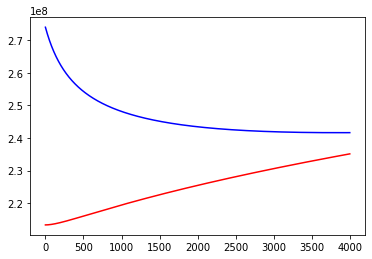

In [36]:
t = range(0,4000,1)
import matplotlib.pyplot as plt
plt.plot(t,tr, c= "red")
plt.plot(t,ts, c = "blue")

In [37]:
tr_err

235151297.29625645

In [38]:
ts_err

241664150.88642538

In [39]:
rr =Ridge(alpha = 4)
model = rr.fit(xtrain,ytrain)

In [40]:
# LASSO

a = []
b = 0
for i in range(0,1000,1):
    b = b + 0.01
    b = round(b,4)
    a.append(b)    

In [41]:
a[-1]

10.0

In [42]:
from sklearn.linear_model import Lasso
tr = []
ts = []
for i in a:
    rr = Lasso(alpha = i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    
    from sklearn.metrics import mean_squared_error
    tr_err = mean_squared_error(ytrain,tr_pred)
    ts_err = mean_squared_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.509e+08, tolerance: 3.335e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.518e+08, tolerance: 3.335e+08
  model = cd_fast.enet_coordinate_descent(


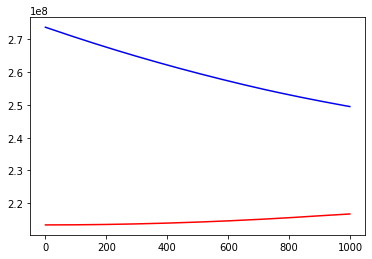

In [43]:
t = range(0,1000,1)
import matplotlib.pyplot as plt
plt.plot(t,tr, c= "red")
plt.plot(t,ts, c = "blue")

In [44]:
tr_err

216685534.48740014

In [45]:
ts_err

249508953.0330682

# Cross validation

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

def model_cv(mobj):
    model = mobj.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    perd_ts = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_err = mean_squared_error(ytrain,pred_tr)
    ts_err = mean_squared_error(ytest,perd_ts)
    return round(tr_err,2), round(ts_err,2)

In [47]:
model_cv(lm)

(213343373.26, 2.800391567310127e+30)

In [48]:
tunning_grid = {"alpha":a}

In [49]:
from sklearn.linear_model import Ridge,Lasso
rr = Ridge()
ls = Lasso()

In [50]:
from sklearn.model_selection import GridSearchCV

cv=GridSearchCV(rr,tunning_grid, scoring ="neg_mean_squared_error", cv=4)
cvmodel = cv.fit(Xnew, Y)
cvmodel.best_params_

{'alpha': 0.99}

In [51]:
from sklearn.model_selection import GridSearchCV

cv=GridSearchCV(ls,tunning_grid, scoring ="neg_mean_squared_error", cv=4)
cvmodel = cv.fit(Xnew, Y)
cvmodel.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.216e+09, tolerance: 2.988e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+10, tolerance: 3.167e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.582e+08, toleranc

{'alpha': 7.38}

In [52]:
rr = Ridge(alpha = 0.99)
model_cv(rr)

(219386605.52, 248262879.58)

In [53]:
#ls = Lasso(alpha = 7.38)
#model_cv(ls)

In [59]:
rr = Ridge(alpha = 0.99)
model_final = rr.fit(Xnew,Y)

## Test data 

In [54]:
xtest = testdata.drop(labels=["Id"],axis = 1)

In [55]:
cat = []
con = []
for i in xtest.columns:
    if(xtest[i].dtypes != "object"):
        con.append(i)
    else:
        cat.append(i)
        
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(xtest[con]),columns = con)
X2 = pd.get_dummies(xtest[cat])
xtest_new = X1.join(X2)

In [56]:
xtest_new['GarageQual_Ex'] = 0

In [57]:
final_xtest = xtest_new[list(xtrain.columns)]

## Final Model Prediction

In [60]:
pred = model_final.predict(final_xtest)

In [61]:
B = testdata[["Id"]]

In [62]:
B['SalePrice']=pred

C:\Users\admin\AppData\Local\Temp\ipykernel_6272\3205833840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['SalePrice']=pred


In [63]:
B

,Id,SalePrice
0,1461,122849.725876
1,1462,162792.611554
2,1463,188432.083219
3,1464,198087.929934
4,1465,196378.244563
...,...,...
1454,2915,94792.595086
1455,2916,98450.390885
1456,2917,171056.060419
1457,2918,114149.526812


In [64]:
B.to_csv("Predicted_model.csv")